<a href="https://colab.research.google.com/github/mikeshawcode/Mike-Shaw-Data-Analytics-Portfolio/blob/main/Superstore_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this analysis is to predict what next week's (12/31/2018 - 1/06/2019) sales will be

Getting a sense of what the data looks like.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Read the dataset
folder_path = '/content/drive/My Drive/Superstore Sales Project/'

df = pd.read_csv(folder_path + 'SuperstoreSales.csv')

# Get basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names and Types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

Mounted at /content/drive
Dataset Shape: (9800, 18)

Column Names and Types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

First few rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016

Getting a range of dates for the data.

Finding any gaps (days without sales).

Organizing chronlogically.

In [ ]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Sort by date
df = df.sort_values('Order Date')

print("Date Range:")
print(f"First order: {df['Order Date'].min()}")
print(f"Last order: {df['Order Date'].max()}")
print(f"Total days: {(df['Order Date'].max() - df['Order Date'].min()).days}")

# Aggregate daily sales
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
print(f"\nTotal days with sales: {len(daily_sales)}")
print(f"\nDaily sales sample:")
print(daily_sales.head(10))
print(daily_sales.tail(10))

Date Range:
First order: 2015-01-03 00:00:00
Last order: 2018-12-30 00:00:00
Total days: 1457

Total days with sales: 1230

Daily sales sample:
  Order Date     Sales
0 2015-01-03    16.448
1 2015-01-04   288.060
2 2015-01-05    19.536
3 2015-01-06  4407.100
4 2015-01-07    87.158
5 2015-01-09    40.544
6 2015-01-10    54.830
7 2015-01-11     9.940
8 2015-01-13  3553.795
9 2015-01-14    61.960
     Order Date      Sales
1220 2018-12-21  2140.9400
1221 2018-12-22  7442.0210
1222 2018-12-23  1926.7760
1223 2018-12-24  6233.0540
1224 2018-12-25  2698.9270
1225 2018-12-26   814.5940
1226 2018-12-27   177.6360
1227 2018-12-28  1657.3508
1228 2018-12-29  2915.5340
1229 2018-12-30   713.7900


Visualize


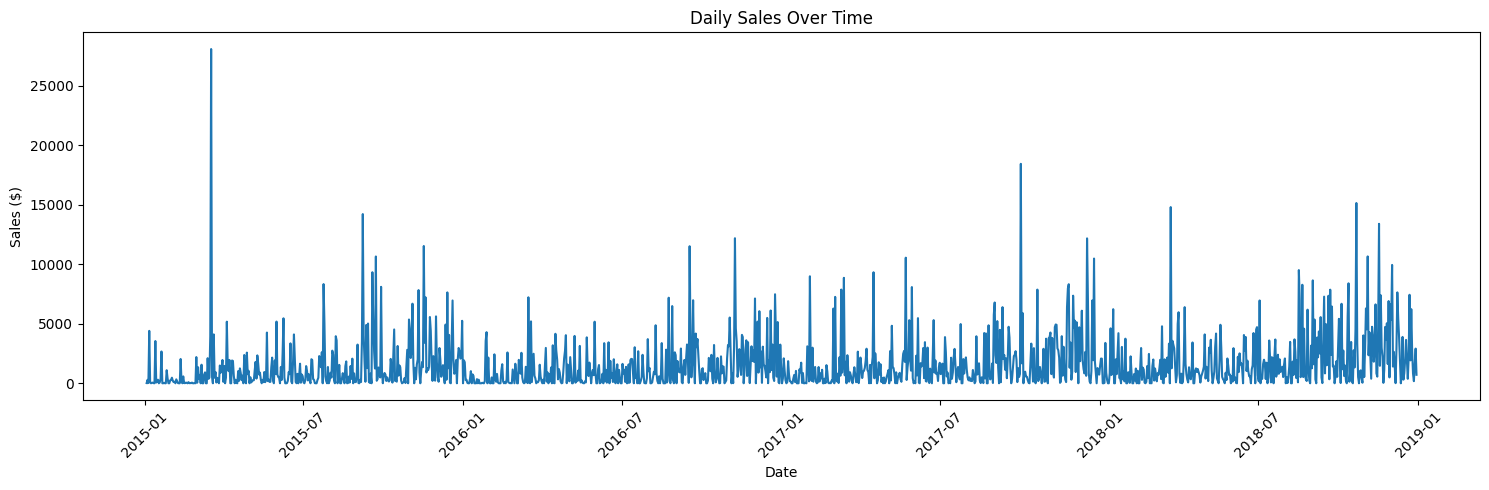

Daily Sales Statistics:
count     1458.000000
mean      1551.122622
std       2211.497717
min          0.000000
25%        119.627000
50%        797.929000
75%       2043.331500
max      28106.716000
Name: Sales, dtype: float64

Days with zero sales: 228


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate to daily sales (filling gaps with 0)
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.set_index('Order Date')

# Create full date range and fill missing days with 0
full_date_range = pd.date_range(start=daily_sales.index.min(),
                                 end=daily_sales.index.max(),
                                 freq='D')
daily_sales = daily_sales.reindex(full_date_range, fill_value=0)
daily_sales.columns = ['Sales']

# Plot overall trend
plt.figure(figsize=(15, 5))
plt.plot(daily_sales.index, daily_sales['Sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Basic statistics
print("Daily Sales Statistics:")
print(daily_sales['Sales'].describe())
print(f"\nDays with zero sales: {(daily_sales['Sales'] == 0).sum()}")

More clearly outline the column names, visualize and understand trends

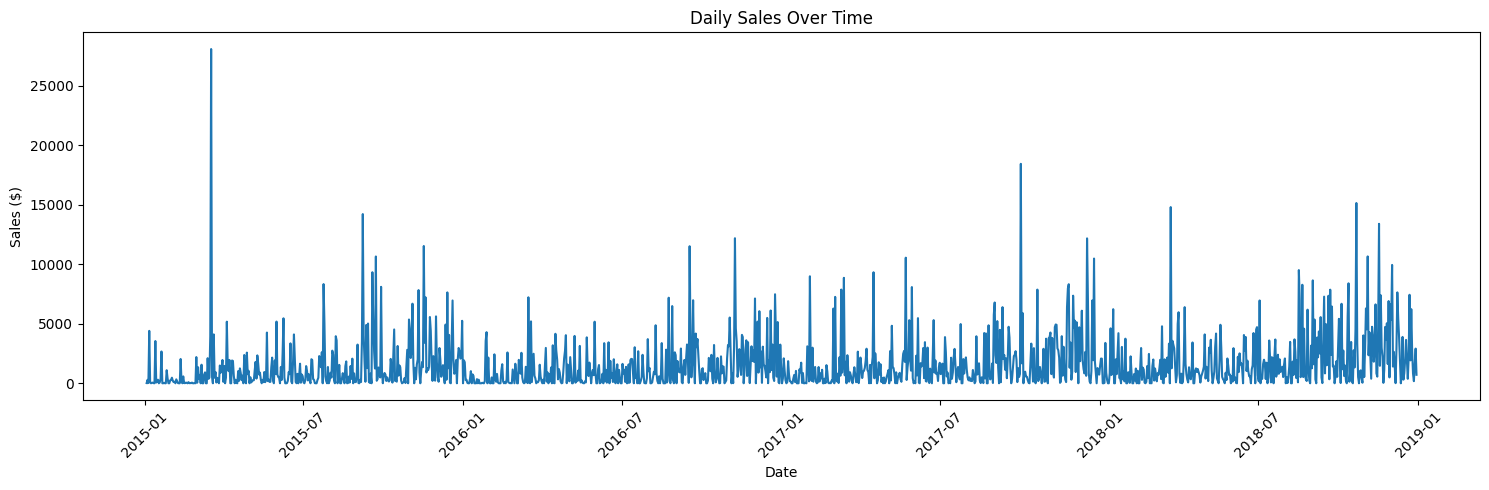

Daily Sales Statistics:
count     1458.000000
mean      1551.122622
std       2211.497717
min          0.000000
25%        119.627000
50%        797.929000
75%       2043.331500
max      28106.716000
Name: Sales, dtype: float64

Days with zero sales: 228

First 10 days:
        Date     Sales
0 2015-01-03    16.448
1 2015-01-04   288.060
2 2015-01-05    19.536
3 2015-01-06  4407.100
4 2015-01-07    87.158
5 2015-01-08     0.000
6 2015-01-09    40.544
7 2015-01-10    54.830
8 2015-01-11     9.940
9 2015-01-12     0.000


In [ ]:
# Aggregate to daily sales
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Create full date range
full_date_range = pd.date_range(start=daily_sales['Order Date'].min(),
                                 end=daily_sales['Order Date'].max(),
                                 freq='D')

# Create a proper dataframe with all dates
daily_sales_full = pd.DataFrame({'Date': full_date_range})
daily_sales_full = daily_sales_full.merge(daily_sales,
                                           left_on='Date',
                                           right_on='Order Date',
                                           how='left')
daily_sales_full['Sales'] = daily_sales_full['Sales'].fillna(0)
daily_sales_full = daily_sales_full[['Date', 'Sales']]

# Now plot with clear labels
plt.figure(figsize=(15, 5))
plt.plot(daily_sales_full['Date'], daily_sales_full['Sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistics
print("Daily Sales Statistics:")
print(daily_sales_full['Sales'].describe())
print(f"\nDays with zero sales: {(daily_sales_full['Sales'] == 0).sum()}")
print(f"\nFirst 10 days:")
print(daily_sales_full.head(10))

More visualizing, on a smaller scale:

Avg. Daily Sales by month

Avg. Daily Sales by week

Avg. Daily Sales by quarter

Avg. Daily Sales by year

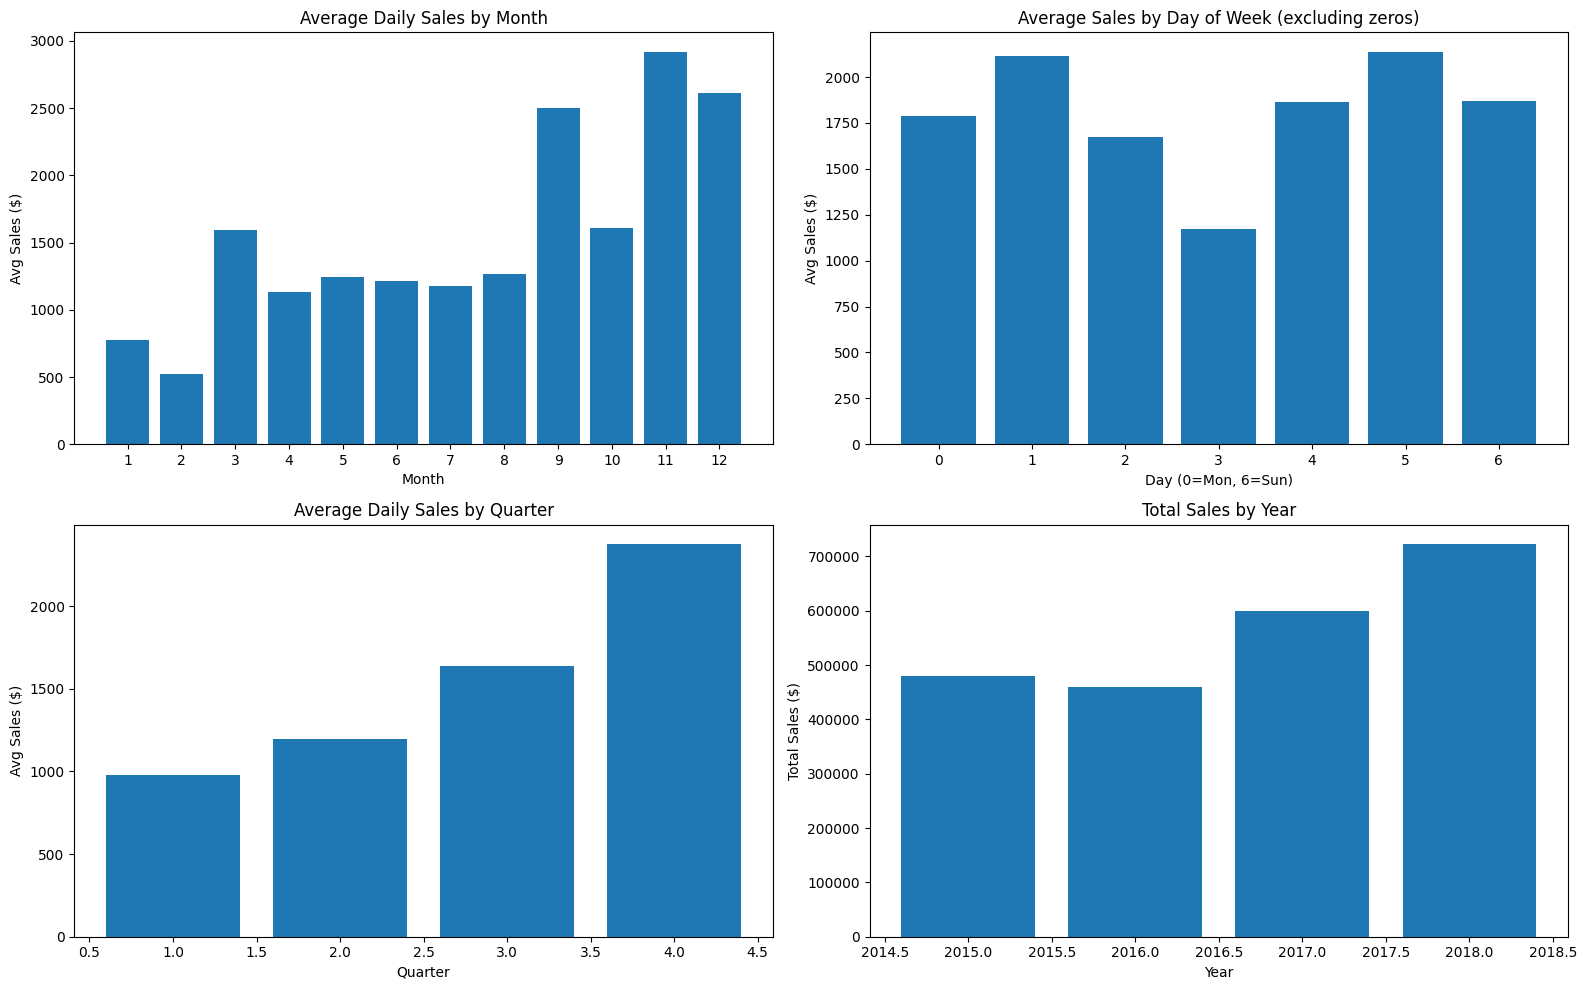

Top 10 highest sales days:
           Date       Sales
74   2015-03-18  28106.7160
1003 2017-10-02  18452.9720
1388 2018-10-22  15158.8770
1175 2018-03-23  14816.0680
248  2015-09-08  14228.4280
1414 2018-11-17  13408.7928
675  2016-11-08  12196.9970
1079 2017-12-17  12185.1340
318  2015-11-17  11544.2740
623  2016-09-17  11525.0060


In [ ]:
# Add time features for analysis
daily_sales_full['Year'] = daily_sales_full['Date'].dt.year
daily_sales_full['Month'] = daily_sales_full['Date'].dt.month
daily_sales_full['DayOfWeek'] = daily_sales_full['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
daily_sales_full['Quarter'] = daily_sales_full['Date'].dt.quarter

# 1. Monthly average sales by year
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Monthly patterns
monthly_avg = daily_sales_full.groupby('Month')['Sales'].mean()
axes[0, 0].bar(monthly_avg.index, monthly_avg.values)
axes[0, 0].set_title('Average Daily Sales by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Avg Sales ($)')
axes[0, 0].set_xticks(range(1, 13))

# Day of week patterns
dow_avg = daily_sales_full[daily_sales_full['Sales'] > 0].groupby('DayOfWeek')['Sales'].mean()
axes[0, 1].bar(dow_avg.index, dow_avg.values)
axes[0, 1].set_title('Average Sales by Day of Week (excluding zeros)')
axes[0, 1].set_xlabel('Day (0=Mon, 6=Sun)')
axes[0, 1].set_ylabel('Avg Sales ($)')

# Quarterly patterns
quarterly_avg = daily_sales_full.groupby('Quarter')['Sales'].mean()
axes[1, 0].bar(quarterly_avg.index, quarterly_avg.values)
axes[1, 0].set_title('Average Daily Sales by Quarter')
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Avg Sales ($)')

# Year over year
yearly_total = daily_sales_full.groupby('Year')['Sales'].sum()
axes[1, 1].bar(yearly_total.index, yearly_total.values)
axes[1, 1].set_title('Total Sales by Year')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Total Sales ($)')

plt.tight_layout()
plt.show()

# Check that outlier
print("Top 10 highest sales days:")
print(daily_sales_full.nlargest(10, 'Sales')[['Date', 'Sales']])

Forecasting the next week incoming...

Lets install Prophet, a meta built tool for forecasting.

In [ ]:
# Install Prophet
!pip install prophet

# Import
from prophet import Prophet

# Prophet requires specific column names: 'ds' (date) and 'y' (value)
prophet_df = daily_sales_full[['Date', 'Sales']].copy()
prophet_df.columns = ['ds', 'y']

print("Data prepared for Prophet:")
print(prophet_df.head())
print(f"\nShape: {prophet_df.shape}")
print(f"Date range: {prophet_df['ds'].min()} to {prophet_df['ds'].max()}")

Data prepared for Prophet:
          ds         y
0 2015-01-03    16.448
1 2015-01-04   288.060
2 2015-01-05    19.536
3 2015-01-06  4407.100
4 2015-01-07    87.158

Shape: (1458, 2)
Date range: 2015-01-03 00:00:00 to 2018-12-30 00:00:00


Train the prophet model

In [ ]:
# Initialize Prophet model
# We'll add weekly and yearly seasonality since we confirmed both patterns
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,  # Don't need this for daily aggregated data
    seasonality_mode='multiplicative'  # Better for retail data with growing variance
)

# Fit the model
print("Training Prophet model...")
model.fit(prophet_df)
print("Model trained!")

Training Prophet model...
Model trained!


Make the 7-Day Forecast

In [ ]:
# Create future dataframe for next 7 days
future = model.make_future_dataframe(periods=7, freq='D')
print(f"Forecasting from {future['ds'].min()} to {future['ds'].max()}")

# Generate predictions
forecast = model.predict(future)

# Show the 7-day forecast
print("\n7-Day Forecast (Dec 31, 2018 - Jan 6, 2019):")
forecast_7days = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
print(forecast_7days)

# Rename for clarity
forecast_7days.columns = ['Date', 'Predicted_Sales', 'Lower_Bound', 'Upper_Bound']
print("\n" + "="*60)
print(forecast_7days.to_string(index=False))

Forecasting from 2015-01-03 00:00:00 to 2019-01-06 00:00:00

7-Day Forecast (Dec 31, 2018 - Jan 6, 2019):
             ds         yhat   yhat_lower   yhat_upper
1458 2018-12-31  2328.262664  -165.314877  4757.749465
1459 2019-01-01  2589.646276     4.425249  5276.569074
1460 2019-01-02  1598.869146  -871.682261  4224.918753
1461 2019-01-03   400.316148 -2130.126021  3100.098727
1462 2019-01-04  1177.855585 -1334.870915  3838.065750
1463 2019-01-05  2167.413154  -489.144133  4825.997421
1464 2019-01-06  1749.824713  -916.240487  4377.167218

      Date  Predicted_Sales  Lower_Bound  Upper_Bound
2018-12-31      2328.262664  -165.314877  4757.749465
2019-01-01      2589.646276     4.425249  5276.569074
2019-01-02      1598.869146  -871.682261  4224.918753
2019-01-03       400.316148 -2130.126021  3100.098727
2019-01-04      1177.855585 -1334.870915  3838.065750
2019-01-05      2167.413154  -489.144133  4825.997421
2019-01-06      1749.824713  -916.240487  4377.167218


Visualize the forecast

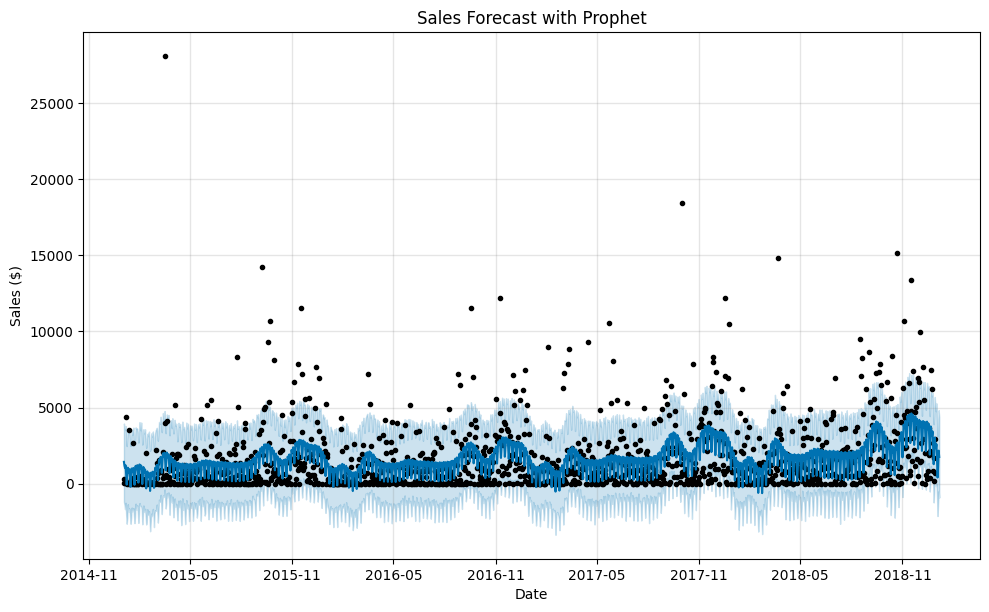

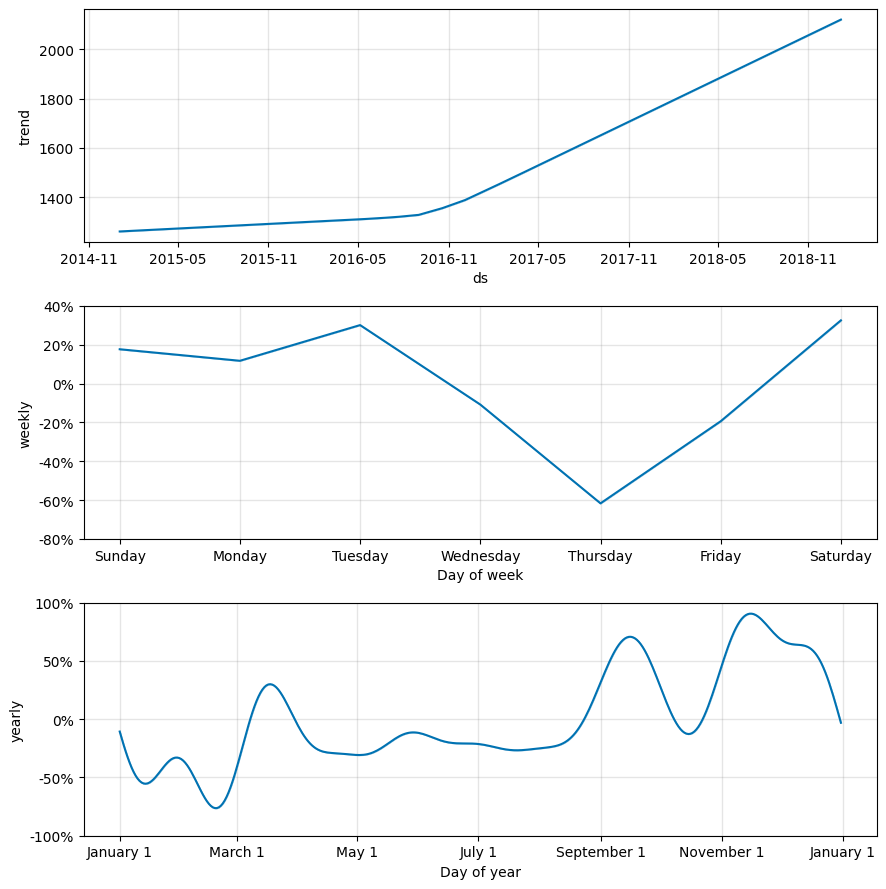

In [ ]:
# Plot forecast
fig1 = model.plot(forecast)
plt.title('Sales Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.show()

# Plot components (trend + seasonality)
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
# Show the last 7 rows of the forecast (these are the future predictions)
print("="*70)
print("7-DAY SALES FORECAST (Dec 31, 2018 - Jan 6, 2019)")
print("="*70)

# Get just the forecast period
forecast_7days = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

# Rename columns for clarity
forecast_7days_clean = forecast_7days.copy()
forecast_7days_clean.columns = ['Date', 'Predicted_Sales', 'Lower_Bound', 'Upper_Bound']

print(forecast_7days_clean.to_string(index=False))

print("\n" + "="*70)
print(f"Total Predicted Sales (7 days): ${forecast_7days_clean['Predicted_Sales'].sum():,.2f}")
print(f"Average Daily Sales: ${forecast_7days_clean['Predicted_Sales'].mean():,.2f}")
print("="*70)

7-DAY SALES FORECAST (Dec 31, 2018 - Jan 6, 2019)
      Date  Predicted_Sales  Lower_Bound  Upper_Bound
2018-12-31      2328.262664  -165.314877  4757.749465
2019-01-01      2589.646276     4.425249  5276.569074
2019-01-02      1598.869146  -871.682261  4224.918753
2019-01-03       400.316148 -2130.126021  3100.098727
2019-01-04      1177.855585 -1334.870915  3838.065750
2019-01-05      2167.413154  -489.144133  4825.997421
2019-01-06      1749.824713  -916.240487  4377.167218

Total Predicted Sales (7 days): $12,012.19
Average Daily Sales: $1,716.03
